# Load data

Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Data path

In [0]:
path = "/content/drive/My Drive/ML With python /Final/data3.txt"

In [0]:
import pandas as pd
data = pd.read_csv(path, sep=",", header = None)

Data info

In [6]:
data.shape

(195, 2)

In [7]:
data.head()

,0,1
0,1.225,2.7
1,4.125,5.1
2,6.375,8.6
3,10.475,11.3
4,13.475,13.2


In [8]:
data.tail()

,0,1
190,31.275,11.20
191,30.675,14.65
192,29.875,15.65
193,31.425,13.40
194,32.175,12.35


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
0    195 non-null float64
1    195 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


# 4.1

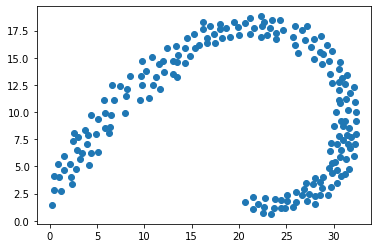

In [10]:
import matplotlib.pyplot as plt
plt.scatter(data[0], data[1])

==> Phân bố ko đều, mật độ ko đồng nhất

# 4.2

K-Means clustering algorithm fails to give good results when the data contains outliers, the density spread of data points across the data space is different and the data points follow non-convex shapes

==> Chọn Hierarchical Clustering

# 4.3 + 4.4

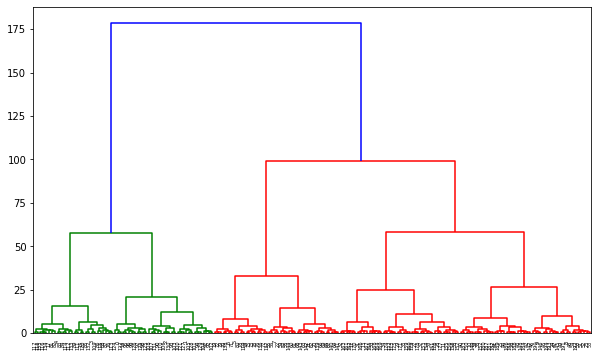

In [11]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,6))
dend = shc.dendrogram(shc.linkage(data, method='ward')) 
plt.show()

==> Có 2 cụm chính, cụm (1) to hơn cụm (0)

In [12]:
# cluster = 2 
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, 
                                  affinity='euclidean', 
                                  linkage='ward') 
cluster.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [13]:
cluster.labels_

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
data['Group'] = pd.Series(cluster.labels_)
data.head()

,0,1,Group
0,1.225,2.7,1
1,4.125,5.1,1
2,6.375,8.6,1
3,10.475,11.3,1
4,13.475,13.2,1


# 4.5

In [0]:
import numpy as np
X_test = np.array([[5.5, 9.5], [16.5, 15.5], [30.0, 10.0], [29.375, 3.0]])

In [24]:
cluster.fit_predict(X_test)

array([0, 0, 1, 1])

# 4.6

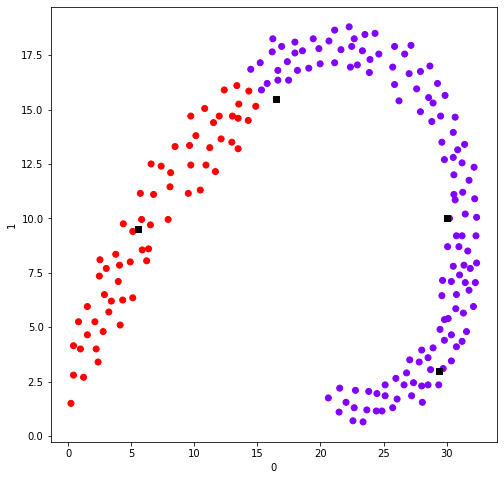

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(data[0], data[1], c=cluster.labels_, cmap='rainbow')  
plt.scatter(X_test[:,0],X_test[:,1], color="black", marker='s')
plt.xlabel("0")
plt.ylabel("1")
plt.show()